# Model Description

This model is based on work by Guanella et al. 2007. For more details, see the reference:

Guanella, A., Kiper, D. & Verschure, P. A model of grid cells based on a twisted torus topology. Int. J. Neural Syst. 17, 231–240 (2007). 

## Activity and Stabilization
A set of $N$ comodular grid cells's activity is modeled. The activity of neuron $i$ at time $t$ is given by the following:

\begin{gather}
A_i(t) = B_i(t) + \tau\bigg(\frac{B_i(t)} {{<B_j(t-1)>}_{j=1}^{N}} - B_i(t)\bigg),
\end{gather}

where $\tau$ represents a stabilization factor, ${< \space .\space>}_{j=1}^{N}$ is the mean over cells in the network, and $B_i(t)$ is a linear transfer function defined as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1),
\end{gather}

where $w_{ji}(t-1)$ is the weight from cell $j$ to cell $i$ at time $t-1$, with $i,j \in \{1, 2, ..., N \}$.

Neurons are initialized with random activity uniformly between $0$ and $1/\sqrt N$

## Attractor Dynamics
When the agent is stationary, the weight between neuron $i$ and $j$ is defined as follows:

\begin{gather}
w_{ij} = I \exp \bigg(- \frac{||c_i - c_j||^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The weight is dependent on the relative "positions" of cells $i$ and $j$. The position of neuron $i$ is defined as ${c_i}$ $= (c_{i_{x}}\space ,\space c_{i_{y}})$, $ c_{i_{x}} = (i_x− 0.5)/N_x $, $ c_{i_{y}} = \frac{\sqrt3}{2} (i_y− 0.5)/N_y$ with $i_x \in \{1, 2, ..., N_x\}$ and $i_y \in \{1, 2, ..., N_y\}$, and where $N_x$ and $N_y$ are the number of columns and rows
in the cells matrix and $i_x$ and $i_y$ the column and the row numbers of cell $i$. 

Additionally, global parameters that govern the relationship between all pairs of cells include $I$, the intensity parameter, $\sigma$ the size of the Gaussian, $T$ the shift parameter (see the referenced paper for more details).

Finally, the key to getting triangular grid instead of square ones is to use a distance metric defined as follows: 
$\text{dist}_{tri}({c_i}$ $, $ $ c_j$ $)$ := $\| c_i− c_j \|_{tri} = \text{min}_{k=1}^7 \| c_i $ $− \space  c_j$ $+  \space s_k\|$, 

where

$s_1 := (0, 0)$

$s_2 := (−0.5, \frac{\sqrt3}{2})$

$s_3 := (−0.5, -\frac{\sqrt3}{2})$

$s_4 := (0.5, \frac{\sqrt3}{2})$

$s_5 := (0.5, -\frac{\sqrt3}{2})$

$s_6 := (−1, 0)$

$s_7 := (1, 0)$

and where $\| \space . \space \|$ is the Euclidean norm.

## Modulation
When the agent is moving, the weight between neurons $i$ and $j$ becomes modulated by the velocity $v := (v_x, v_y)$. In essence, the synaptic connections of the network shift in the direction of the agent. This modulation is expressed as follows:
\begin{gather}
w_{ij}(t) =  I \exp \bigg(- \frac{\|c_i - c_j+ \alpha R_{\beta}v(t-1)\|^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The scale and orientation of the grid is dictated by the gain factor $\alpha \in \mathbb{R}^+$ and bias $\beta \in [0, π/3]$. The input of the network is thus modulated and biased by the gain and the bias parameters, with $v \longmapsto \alpha R_{\beta}v$ , where $R_{\beta}$ is the rotation matrix of angle $\beta$ defined by
\begin{gather}
R_{\beta} = \begin{bmatrix}
\cos(\beta) & -\sin(\beta) \\
\sin(β) & cos(β)\end{bmatrix}
\end{gather}

## Modifications
This model is modified in two key ways from the model described in Guanella et al 2007. The first modification allows for added heading direction noise at each timestep, and the second introduces landmark inputs to the grid cell network. Heading direction noise is added as $\beta_{\text{noisy}}(t) = \beta + \sigma_{\beta} r(t)$, where $\beta$ is the unmodified bias, $\sigma_{\beta}$ regulates the extent of noise, and $r(t)$ is drawn from the standard normal distribution, and $\beta_{\text{noisy}}(t)$ is still constrained such that $\beta_{\text{noisy}}(t) \in [0, π/3]$ The rotation matrix is then calculated using $\beta_{\text{noisy}}(t)$.

Landmark inputs are added with the addition of landmark cells and their unidirectional excitatory synaptic connections to grid cells. When landmarks are present, each landmark $L_{l}$ is associated with its own dedicated landmark cell population. A given landmark cell's activity $A_{L_{l_m}}$ is dependent on the agent's proximity to the landmark's position, where $l \in \{1, ..., N_L\}$ and where $N_L$ is the number of landmarks present and $m \in \{1, ..., N_{Ln}\}$ where $N_{Ln}$ is a global parameter setting the number of landmark cells dedicated to any given landmark. The activity of landmark cell $A_{L_{l_m}}$ is defined as

\begin{gather}
A_{L_{l_m}} = \begin{cases} 
\alpha_{L_l} \exp \bigg(- \frac{\|p(t) - p_{L_l}\|^2} {\big(\frac{1}{2} q_{L_l}\big)^2} \bigg) &  \text{if} \space ||p(t) - p_{L_l}|| \leq q_{L_l} \\
0 & \text{otherwise},
\end{cases}
\end{gather}

where the strength of landmark $L_l$ is governed by $\alpha_{L_l} \in \mathbb{R}^+$, $p(t):= (p_x(t), p_y(t))$ is the position of the agent at time $t$, $p_{L_l} := (p_{L_{l_x}}, p_{L_{l_y}})$ is the position of $L_l$, and $q_{L_l} \in \mathbb{R}^+$ represents the lookahead distance at which landmark $L_l$ begins recruiting the activity of its landmark cells. To incorporate input from landmark cells, the linear transfer function is modified as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1) + \sum_{l=1}^{N_{L}} \sum_{m=1}^{N_{Ln}} A_{L_{l_m}}(t-1) w_{l_m i}(t-1)
\end{gather}

where $w_{l_mi}$ is the weight from landmark cell $m$, which responds to landmark $l$, to grid cell $i$.

A model containing a Hebbian plasticity term between landmark cells and grid cells makes the following modifications:
1. The weight between each landmark cell and the $N$ grid cells is initialized randomly with values between $0$ and $1/\sqrt N$
2. Hebbian plasticity allows changes in weights between landmark cells and grid cells as follows:

$w_{l_mi}(t) = w_{l_mi}(t-1) + \alpha_{\text{hebb}} (A_i(t-1) A_{L_{m_i}}(t-1)) - \alpha_{\text{decay}}$

where $ \alpha_{\text{hebb}}$ regulates the extent of Hebbian potentiation and $ \alpha_{\text{decay}}$ provides a constant decay factor. Weight values are constrained to be between some minimum $W_{L_{\text{min}}}$ and maximum $W_{L_{\text{max}}}$

# Import Functions and Get Data

In [1]:
# Check if TTGC installed
try:
    import ttgc
except ImportError as e:
    !pip install ttgc

from ttgc import *

import numpy as np
from scipy.ndimage import gaussian_filter1d

import csv
import urllib.request
from pathlib import Path

from matplotlib import pyplot as plt
plt.rcParams["image.cmap"] = "magma"
%config InlineBackend.figure_format = 'retina'

import GPUtil
if len(GPUtil.getAvailable())>1:
    import torch
    torch.cuda.is_available()

In [2]:
# Get the current working directory and check if the example dataset exists
file_name = "open_field.txt"
file_path = Path.cwd().joinpath(file_name)

if not file_path.exists():
    data_url = 'https://raw.githubusercontent.com/johnhwen1/ttgc/refs/heads/main/examples/open_field.txt'
    urllib.request.urlretrieve(data_url, filename=file_name)

In [3]:
data = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        data.append(row)
        
csvfile.close()
pos_temp = helpers.str_to_float(np.array(data)).astype(float)

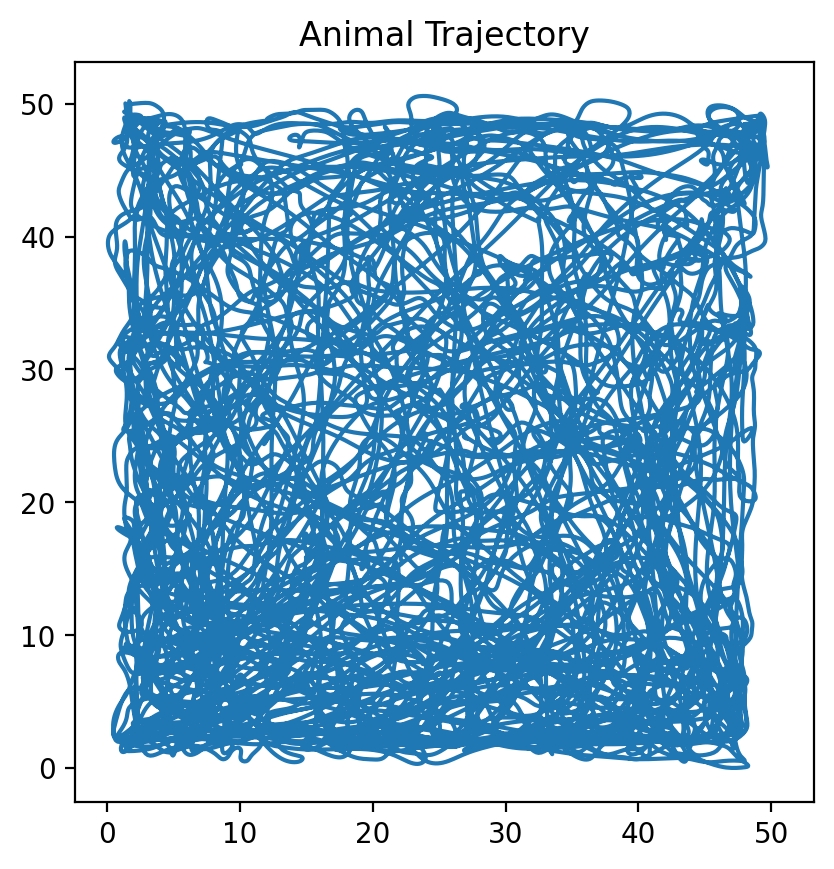

In [4]:
# Filter out non-moving data and get a portion of the data
velocity_temp = np.diff(pos_temp, axis=0)
speed_temp = np.linalg.norm(velocity_temp, axis=-1)
bins_moving = np.where(speed_temp > 0.1)[0]
n_timebins = 50000
pos_moving = pos_temp[bins_moving[:n_timebins+1],:]

# Smooth velocity
sigma_vel = 2
velocity = gaussian_filter1d(np.diff(pos_moving, axis=0).astype(float), sigma_vel, axis=0)
speed = np.linalg.norm(velocity, axis=-1)
pos = pos_moving[0,:] + np.cumsum(velocity, axis=0)

# Plot animal trajectory over time
plt.plot(pos[:,0], pos[:,1])
_ = plt.axis('square')
_ = plt.title('Animal Trajectory')

In [5]:
help(run_sim.run_sim2d)

Help on function run_sim2d in module ttgc.run_sim:

run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha, beta, I, sigma, T, tau, velocity, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb, n_warmup_bins, B0, beta_noise=0, weight_noise=0, W_input=None, W_l_input=None, seed=1, output_bins=10000)
    Runs the full simulation given velocity inputs over time.
    
    Args:
        init_state (np.ndarray): array of shape (N,) containing initialized network activity of all grid cells.
        cell_position_diffs (np.ndarray) array of shape (2, N, N), where N = n_y * n_x, containing the differences in positions between pairs of cells. 
        n_y (int): number of grid cells along the y-axis.
        n_x (int): number of grid cells along the x_axis.
        alpha (float): gain.
        beta (float): bias.
        I (float): intensity parameter.
        sigma (float): Gaussian size.
        T (float): shift parameter.
        tau (float): stabilization s

# Demonstrate Effects of Some Parameters

In [6]:
#

In [ ]:
# calculate maps
for a in range(n_alphas):
    for b in range(n_noisy_betas):
        for l in range(n_l_str):

            this_A = all_As[a,b,l]
            this_pos = all_poss[a,b,l]
            
            all_mean_maps[a,b,l] = calc_2d_maps(this_A, this_pos, n_bins)
            all_spikes[a,b,l] = calc_spikes(this_A, norm_factor)


# Run Experiments

In [7]:
# Set common parameters
n_x = 10 # column n
n_y = 9 # row n
N = n_x * n_y

alpha_sim = 0.08
beta_sim = np.pi/6
I_sim = 0.20
sigma_sim = 0.26
T_sim = 0.04
tau_sim = 0.9
start_pos = pos[0]

# Generate pseudo-borders for border cells
l_pos = []
anchors = [25]
for ai in range(len(anchors)):
    i = anchors[ai]
    l_pos.append(np.array([i, -115]))
    l_pos.append(np.array([i, 164]))
    l_pos.append(np.array([-115, i]))
    l_pos.append(np.array([164, i]))
l_pos = np.array(l_pos)

n_ln = 1
l_lookahead = 122
alpha_hebb = 0
n_warmup_bins = 100
B0 = np.zeros((N))
beta_noise = np.pi/2048

l_pinning_n = 5
l_use_nearby = True
output_bins = np.inf

In [8]:
# Sweep values for variables of interest
all_l_str = np.concatenate((np.arange(0,90,10), np.arange(100,400,100)))
n_l_str = all_l_str.size

all_weight_noises = np.concatenate((np.array([0]), np.linspace(I_sim/8, I_sim/5, 4)))
n_weight_noises = all_weight_noises.size

In [9]:
# Initialize network
cell_positions = initialize.calc_cell_positions(n_y, n_x)
cell_position_diffs = update.calc_cell_position_diffs(cell_positions)
init_state = initialize.initialize_network(n_y, n_x, seed=1)

starting w=0, l=0
Warmup Complete
0


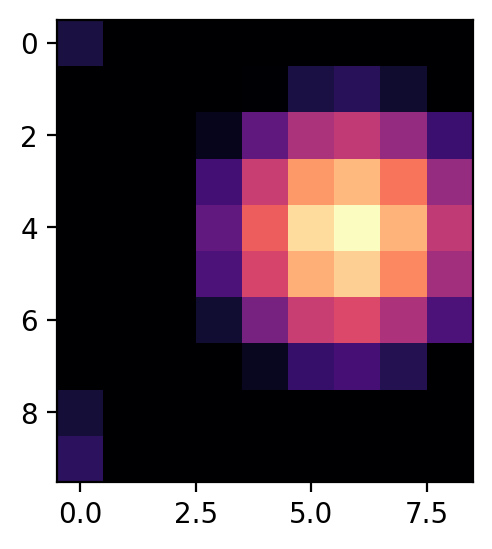

starting w=0, l=1
Warmup Complete
0


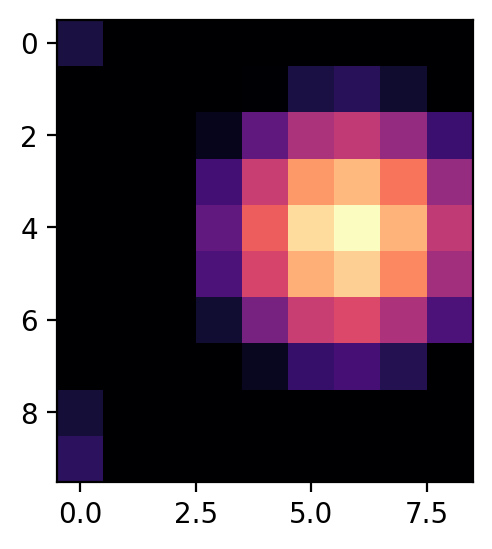

starting w=0, l=2
Warmup Complete
0


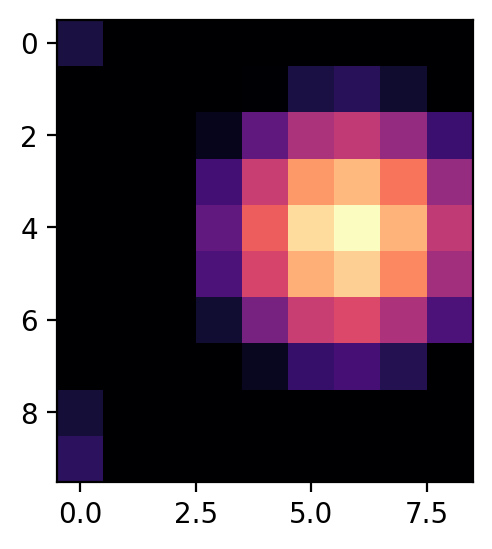

starting w=0, l=3
Warmup Complete
0


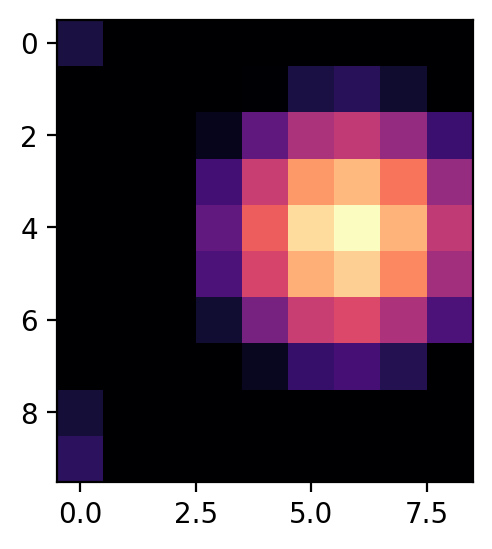

starting w=0, l=4
Warmup Complete
0


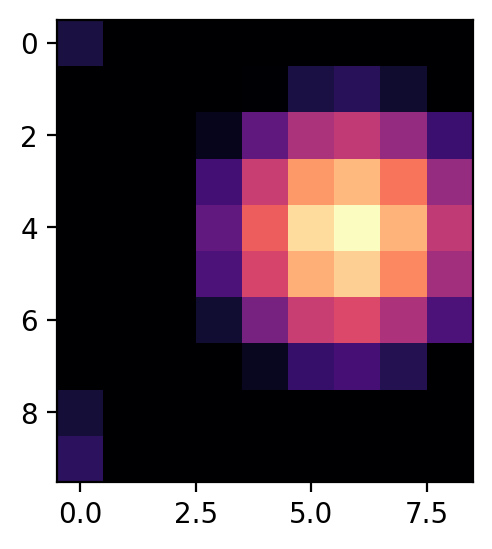

starting w=0, l=5
Warmup Complete
0


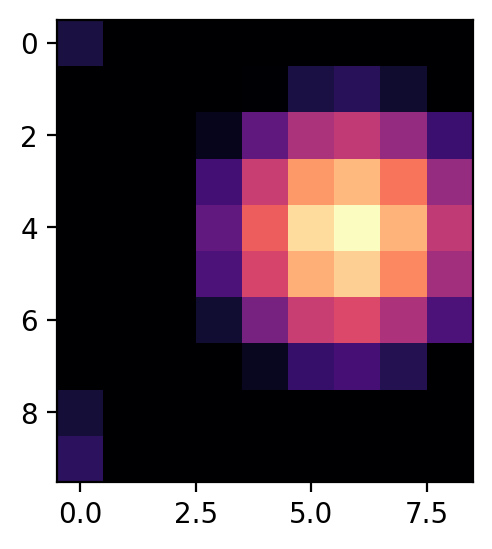

starting w=0, l=6
Warmup Complete
0


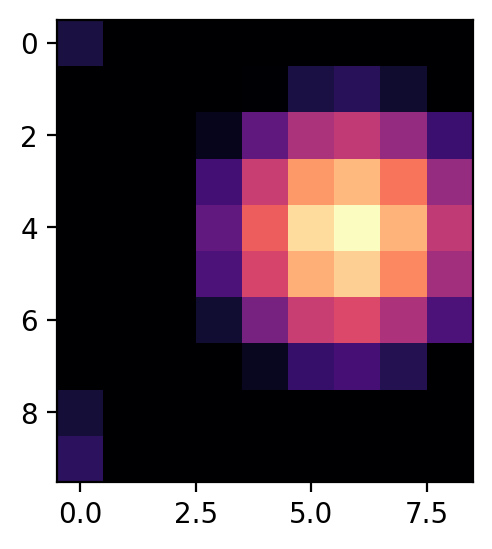

starting w=0, l=7
Warmup Complete
0


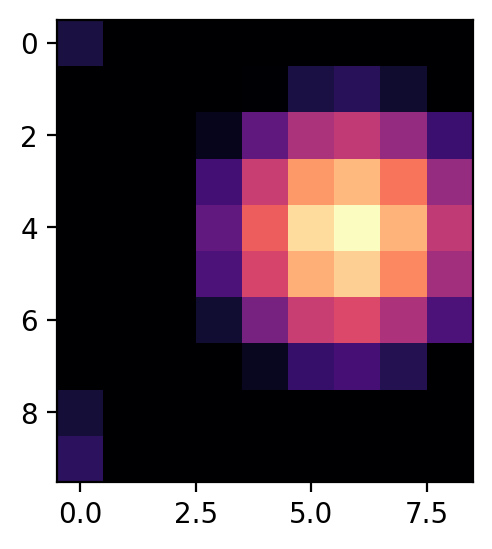

starting w=0, l=8
Warmup Complete
0


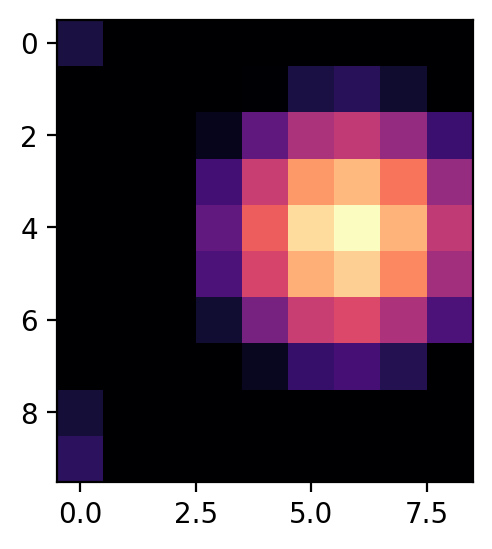

starting w=0, l=9
Warmup Complete
0


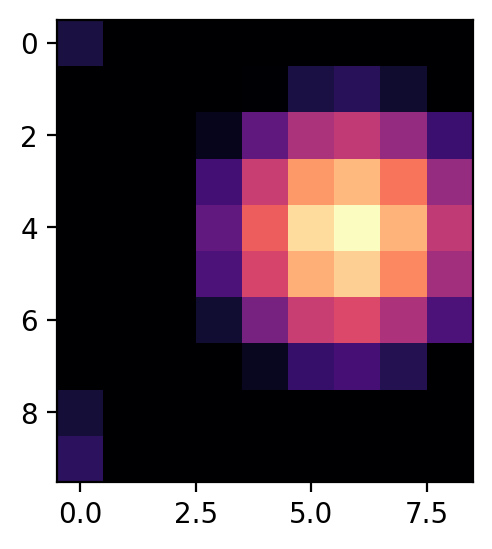

starting w=0, l=10
Warmup Complete
0


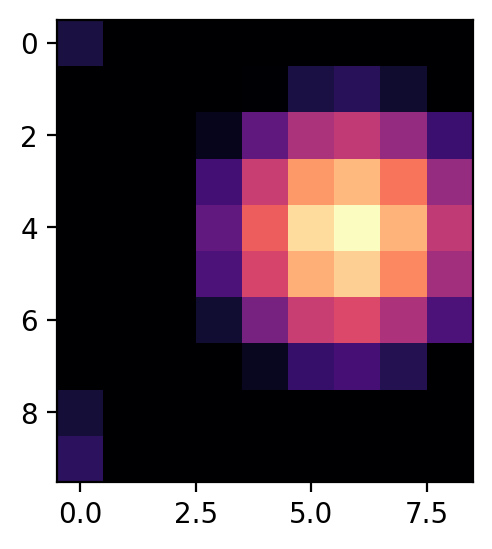

starting w=0, l=11
Warmup Complete
0


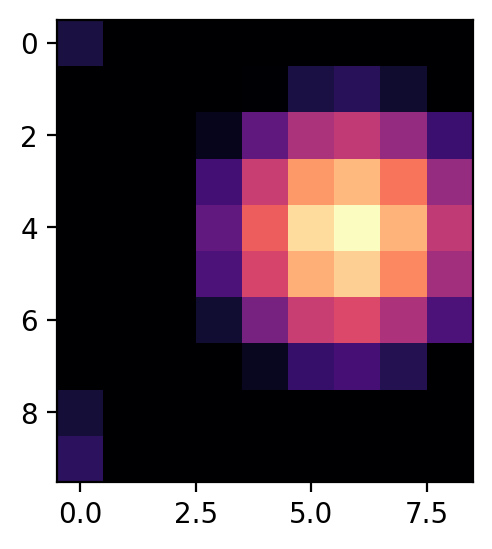

starting w=1, l=0
Warmup Complete
0


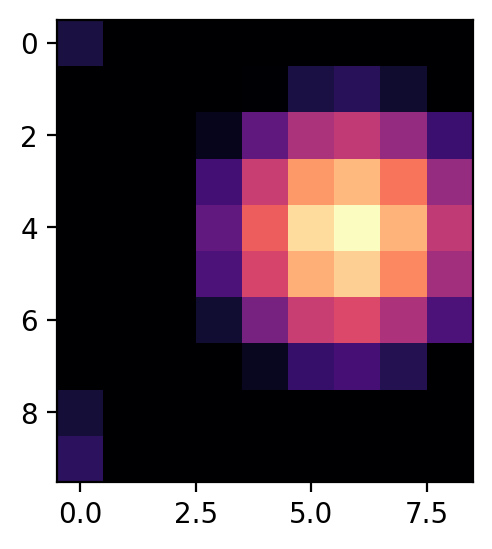

starting w=1, l=1
Warmup Complete
0


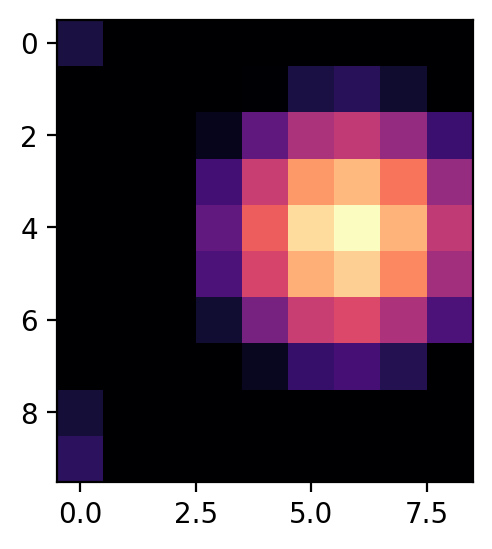

starting w=1, l=2
Warmup Complete
0


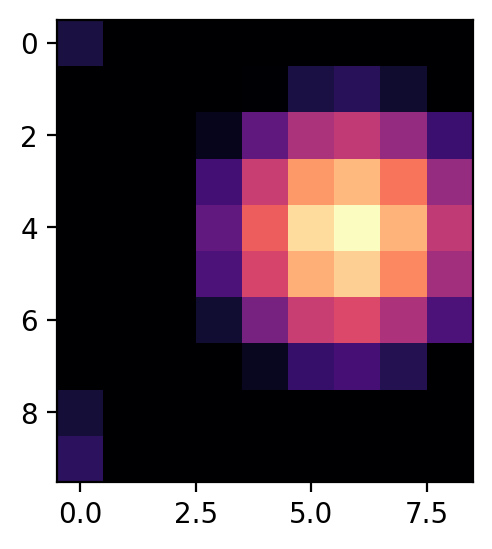

starting w=1, l=3
Warmup Complete
0


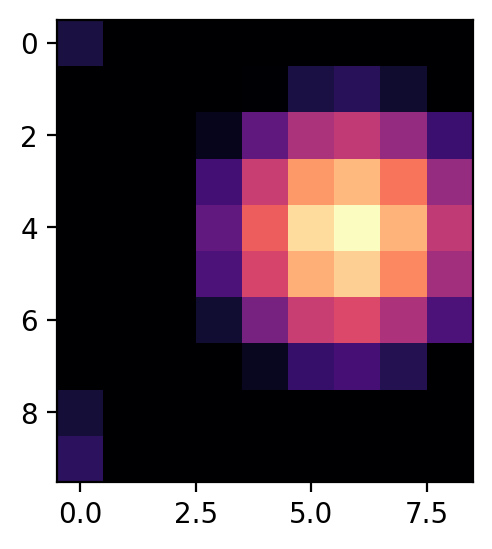

starting w=1, l=4
Warmup Complete
0


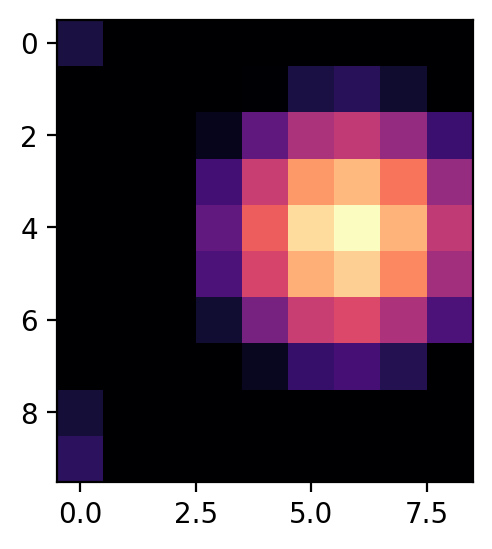

starting w=1, l=5
Warmup Complete
0


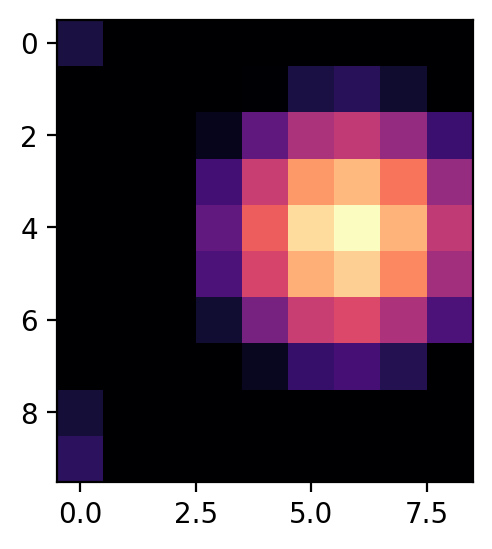

starting w=1, l=6
Warmup Complete
0


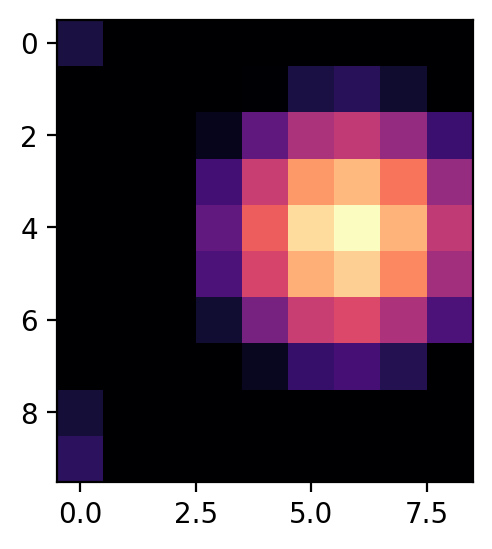

starting w=1, l=7
Warmup Complete
0


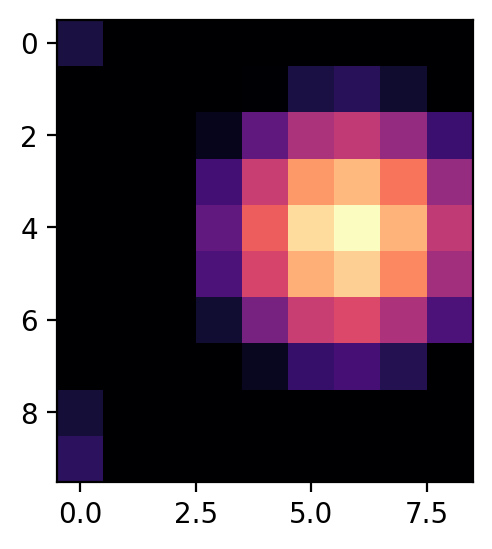

starting w=1, l=8
Warmup Complete
0


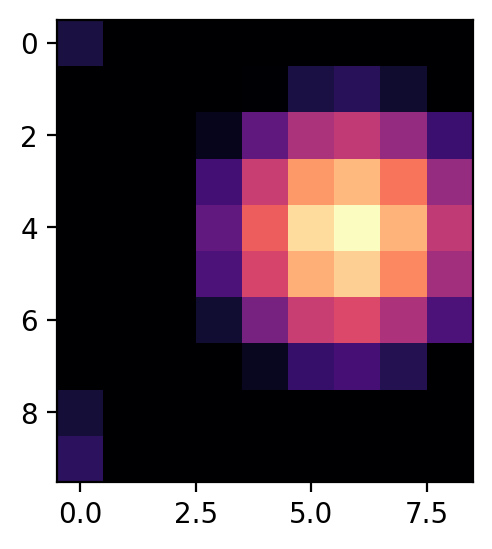

starting w=1, l=9
Warmup Complete
0


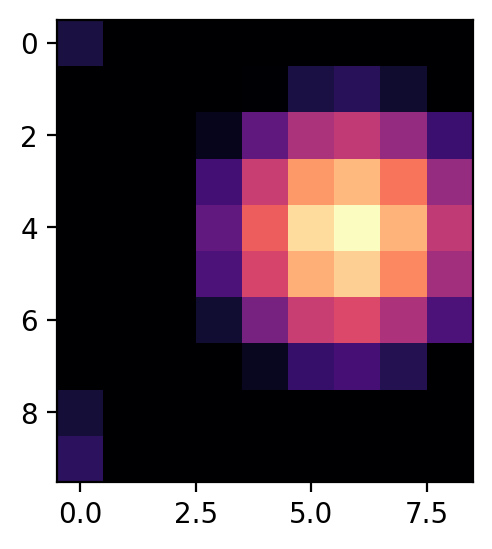

starting w=1, l=10
Warmup Complete
0


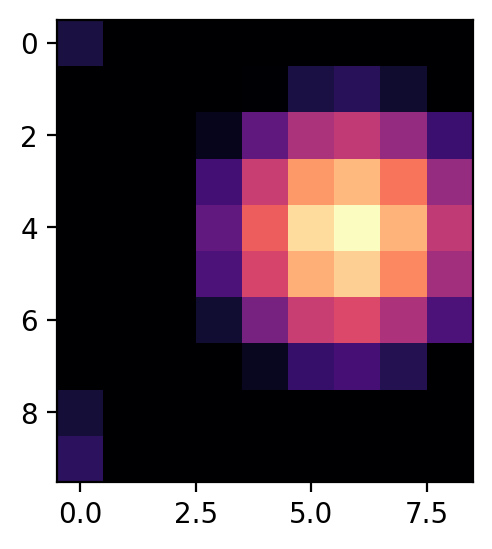

starting w=1, l=11
Warmup Complete
0


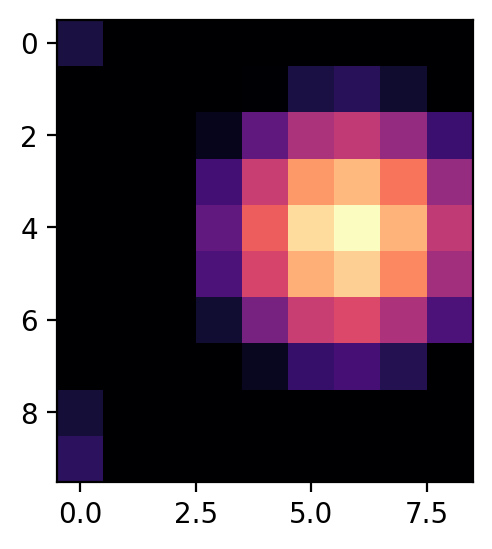

starting w=2, l=0
Warmup Complete
0


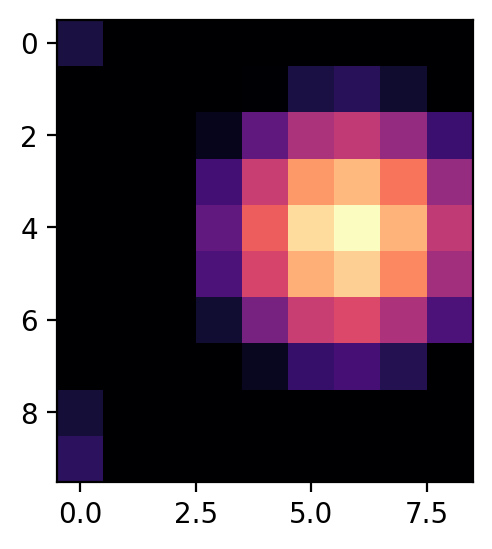

starting w=2, l=1
Warmup Complete
0


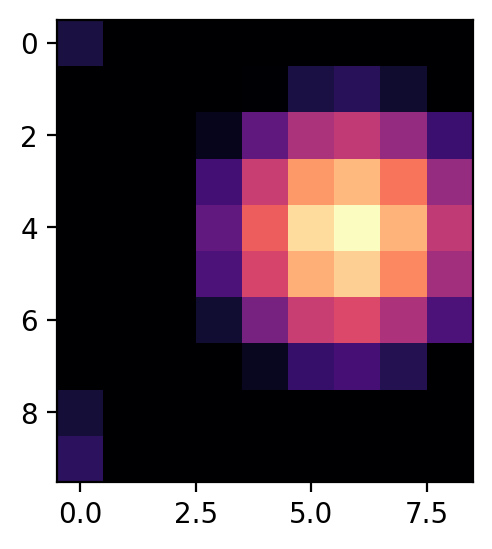

starting w=2, l=2
Warmup Complete
0


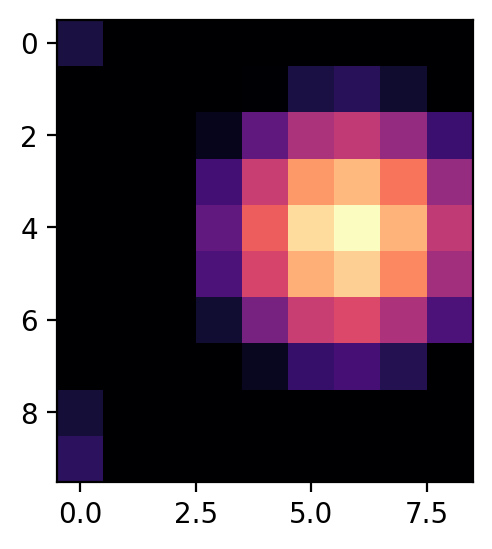

starting w=2, l=3
Warmup Complete
0


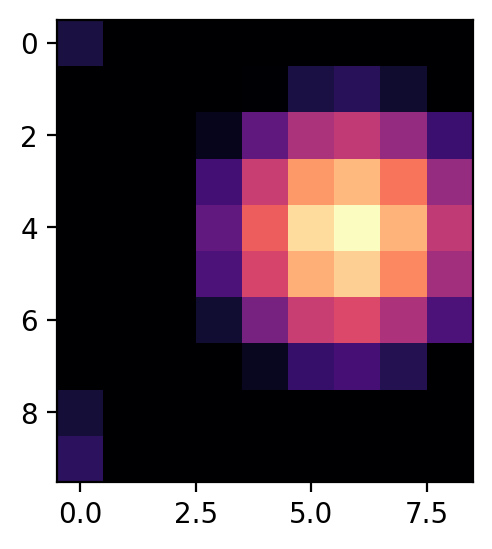

starting w=2, l=4
Warmup Complete
0


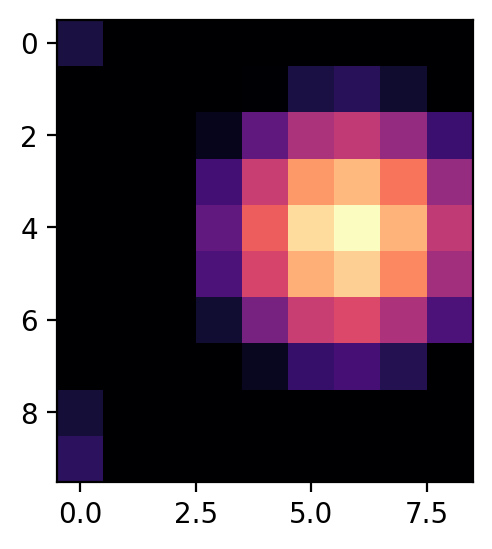

starting w=2, l=5
Warmup Complete
0


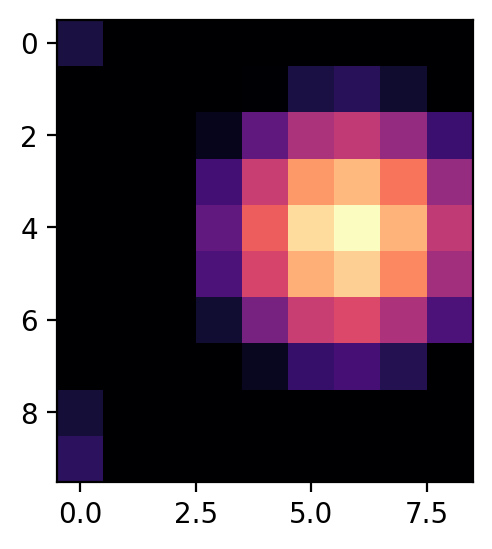

starting w=2, l=6
Warmup Complete
0


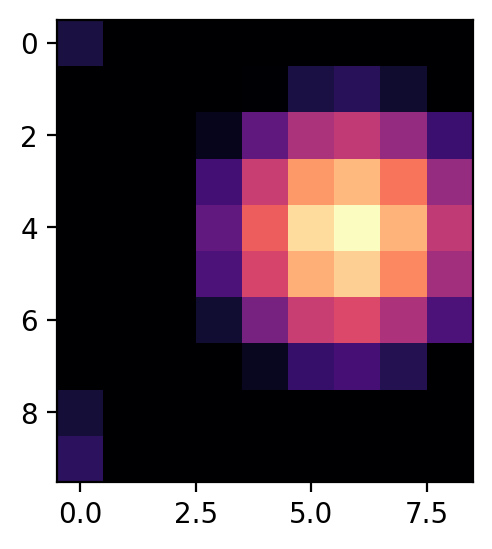

starting w=2, l=7
Warmup Complete
0


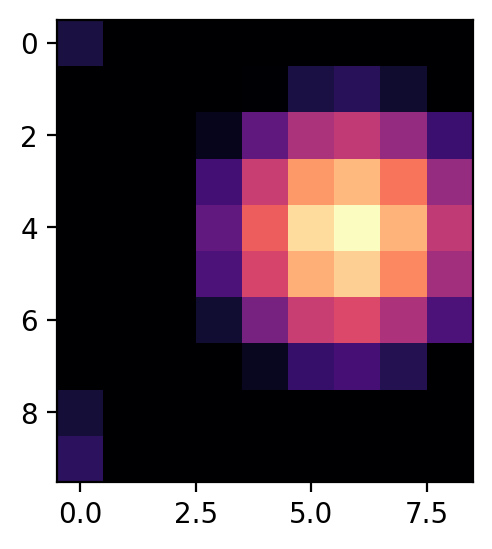

starting w=2, l=8
Warmup Complete
0


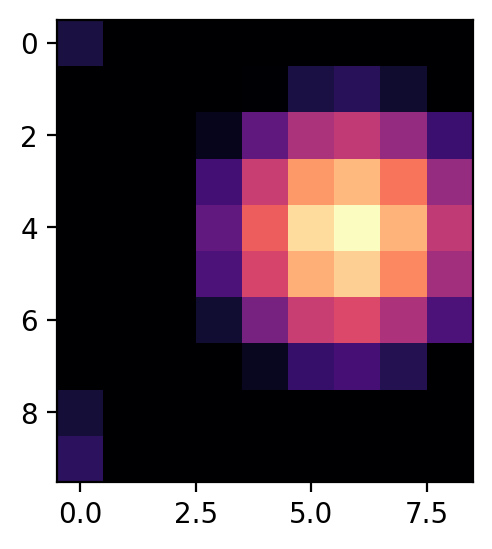

starting w=2, l=9
Warmup Complete
0


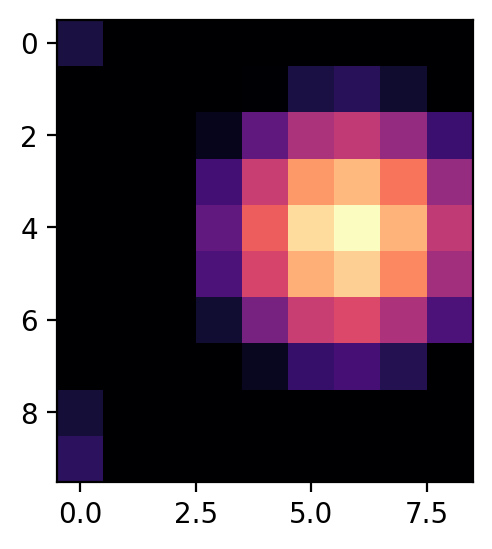

starting w=2, l=10
Warmup Complete
0


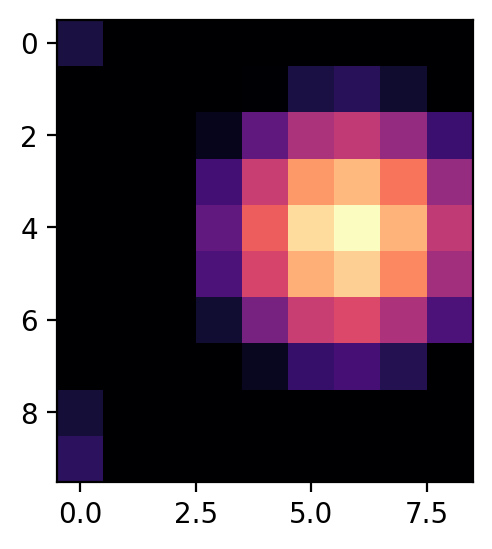

starting w=2, l=11
Warmup Complete
0


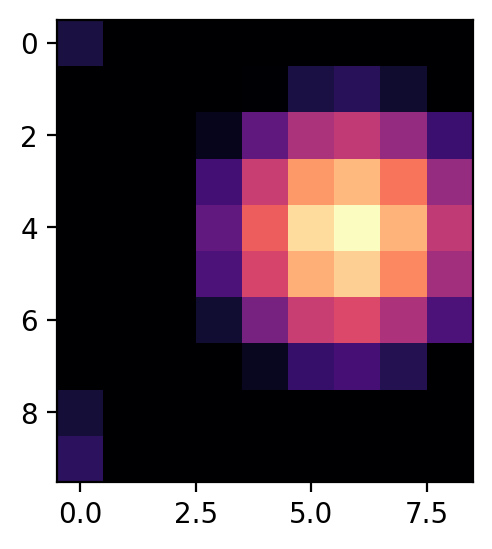

starting w=3, l=0
Warmup Complete
0


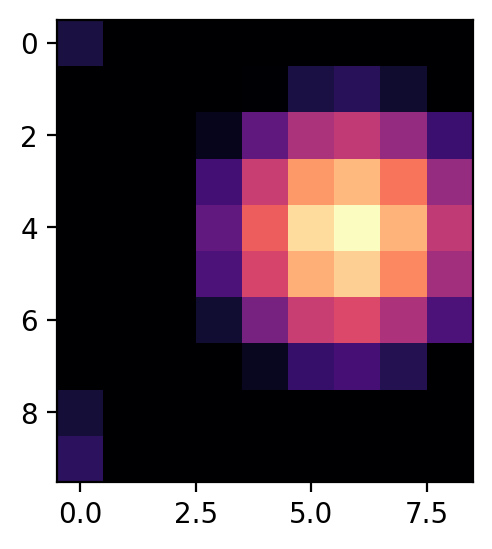

starting w=3, l=1
Warmup Complete
0


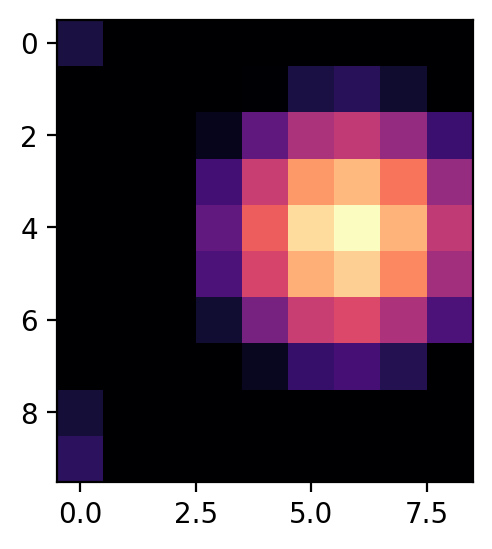

starting w=3, l=2
Warmup Complete
0


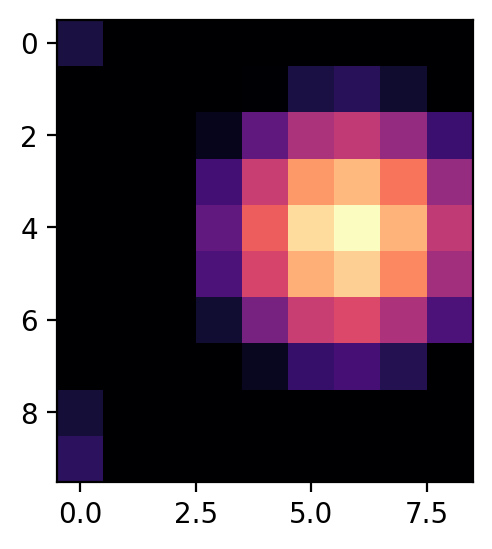

starting w=3, l=3
Warmup Complete
0


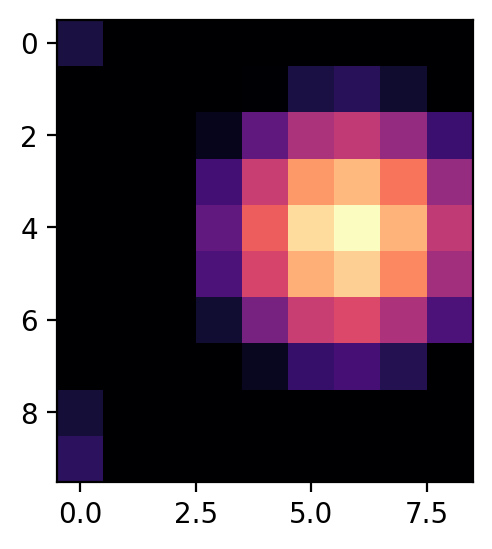

starting w=3, l=4
Warmup Complete
0


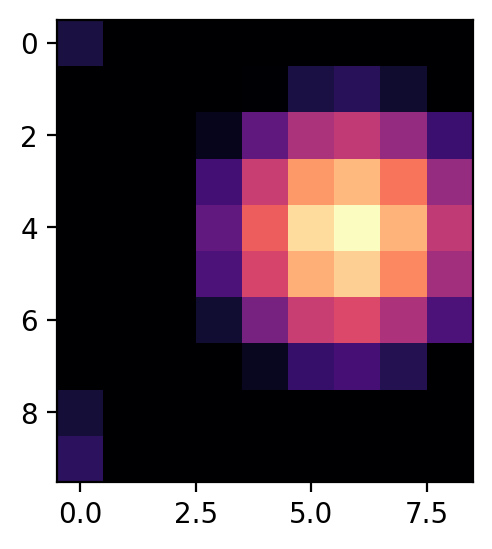

starting w=3, l=5
Warmup Complete
0


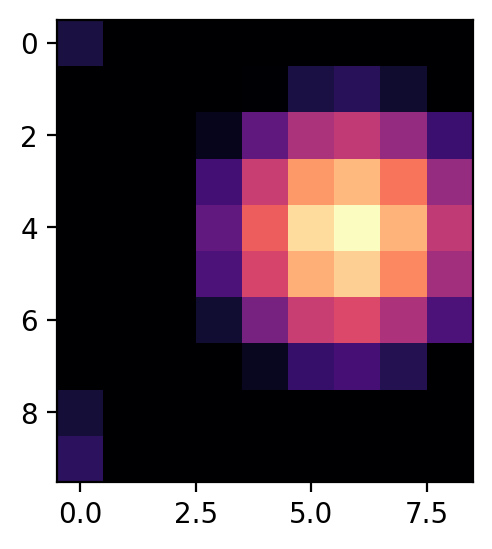

starting w=3, l=6
Warmup Complete
0


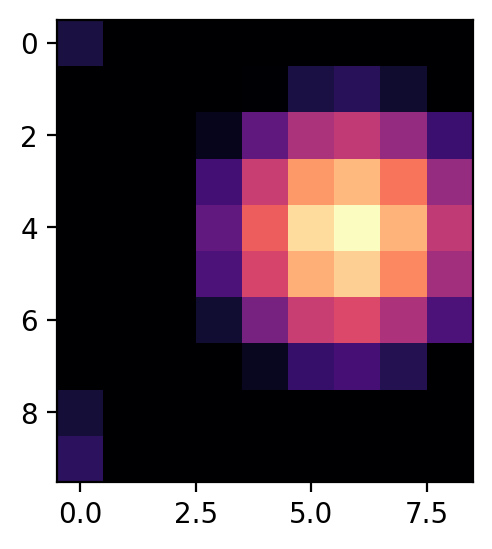

starting w=3, l=7
Warmup Complete
0


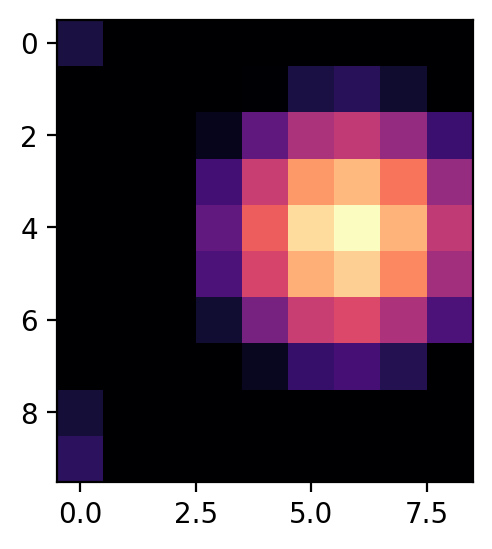

starting w=3, l=8
Warmup Complete
0


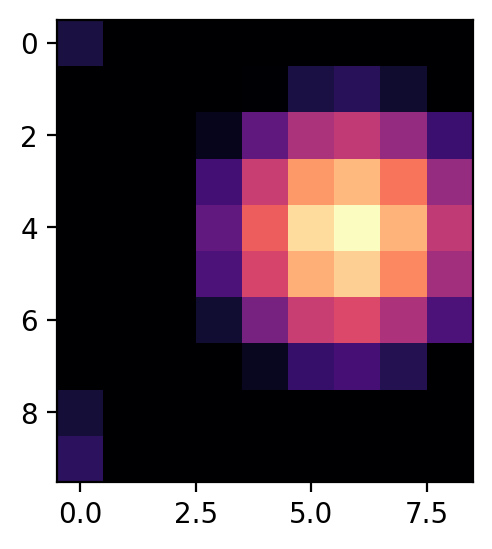

starting w=3, l=9
Warmup Complete
0


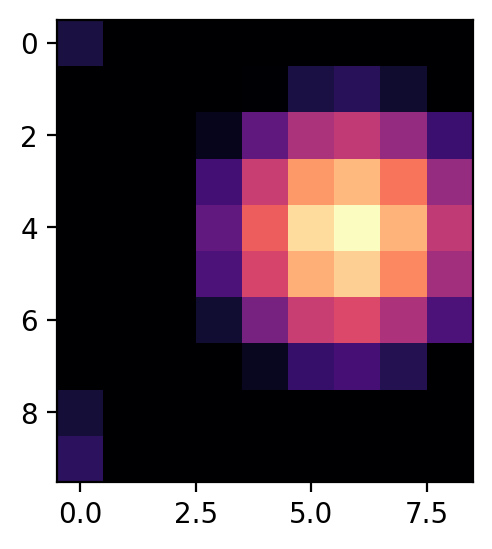

starting w=3, l=10
Warmup Complete
0


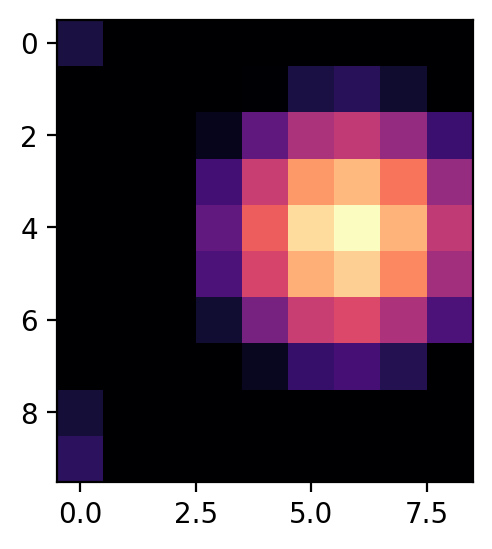

starting w=3, l=11
Warmup Complete
0


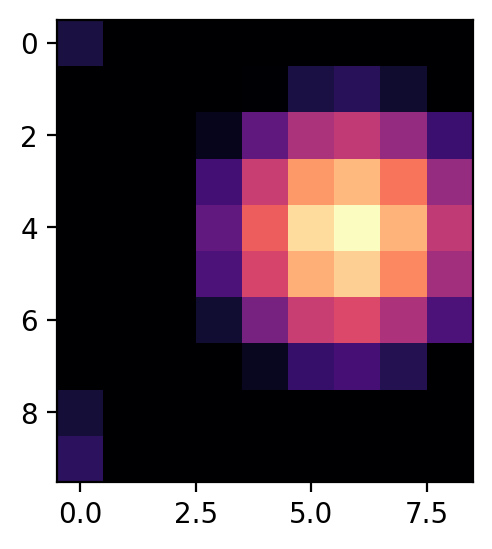

starting w=4, l=0
Warmup Complete
0


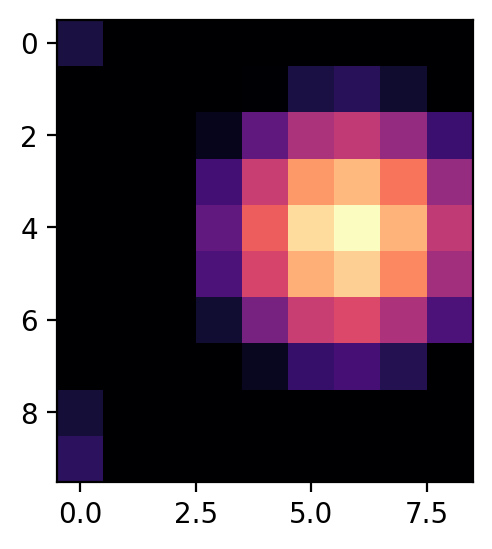

starting w=4, l=1
Warmup Complete
0


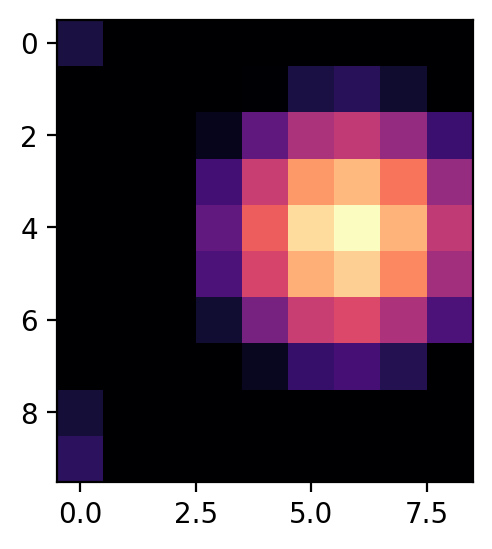

starting w=4, l=2
Warmup Complete
0


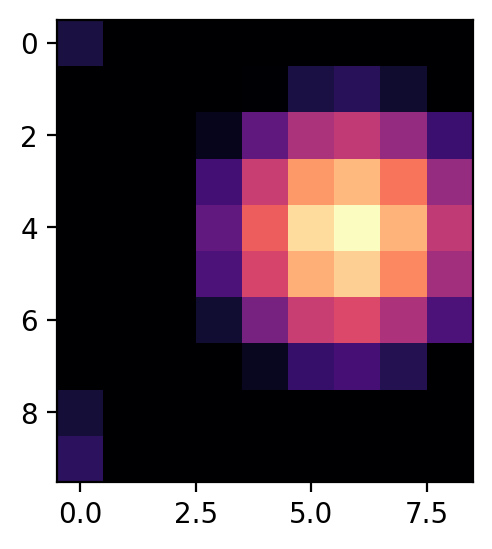

starting w=4, l=3
Warmup Complete
0


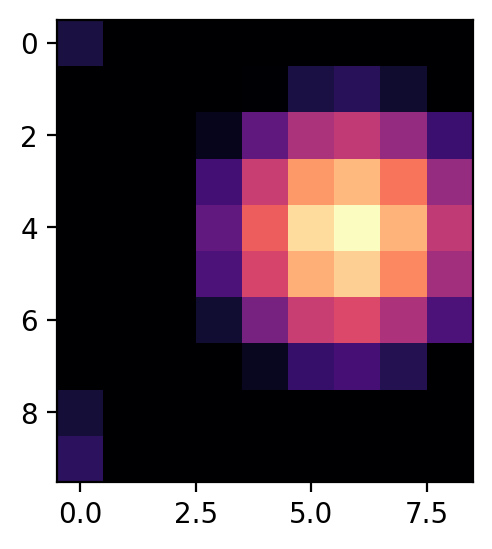

starting w=4, l=4
Warmup Complete
0


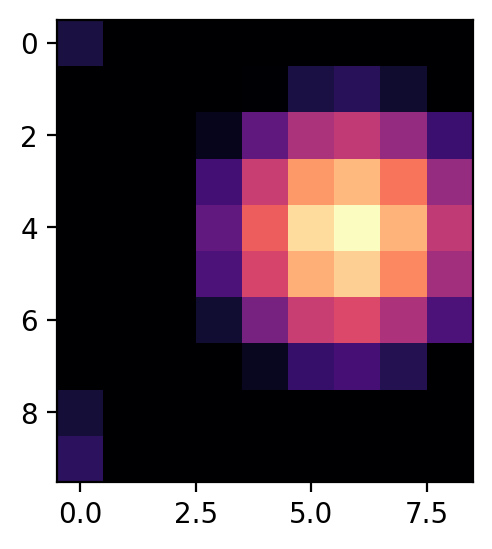

starting w=4, l=5
Warmup Complete
0


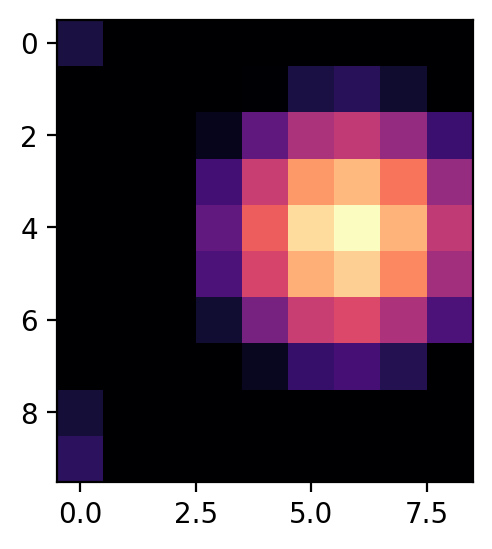

starting w=4, l=6
Warmup Complete
0


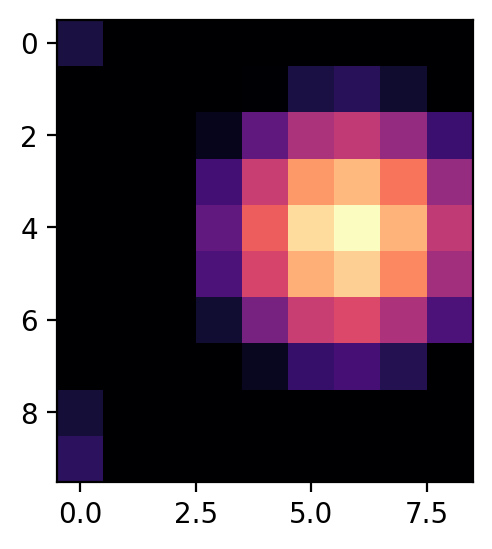

starting w=4, l=7
Warmup Complete
0


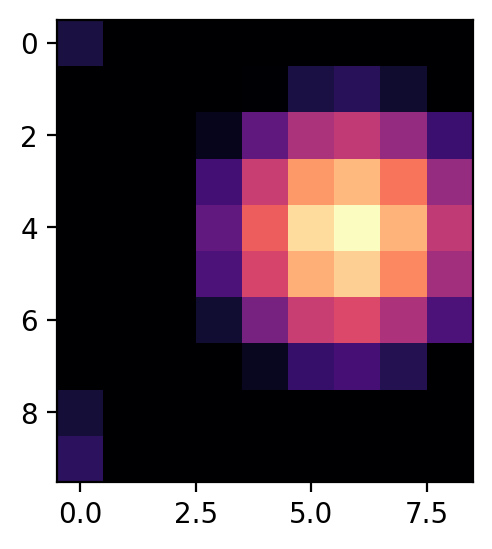

starting w=4, l=8
Warmup Complete
0


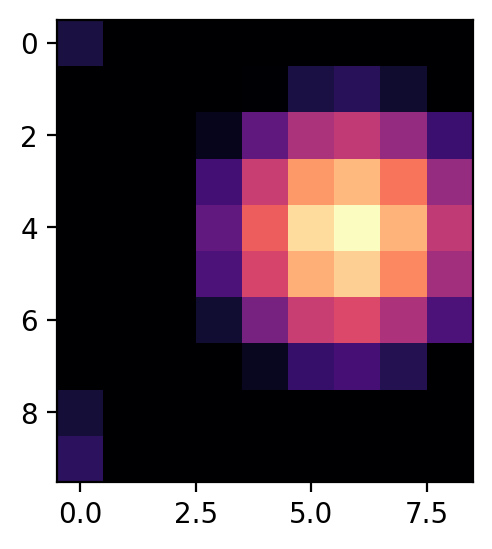

starting w=4, l=9
Warmup Complete
0


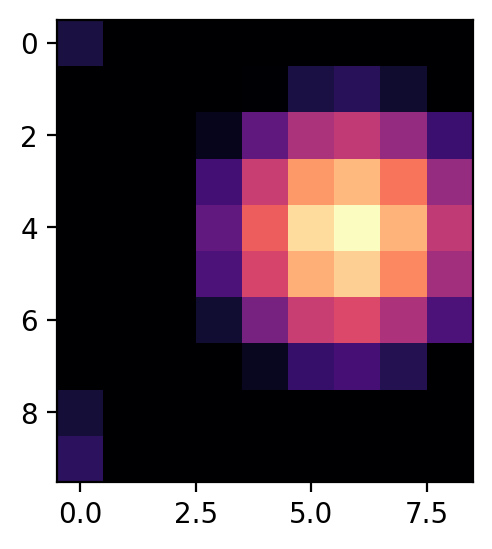

starting w=4, l=10
Warmup Complete
0


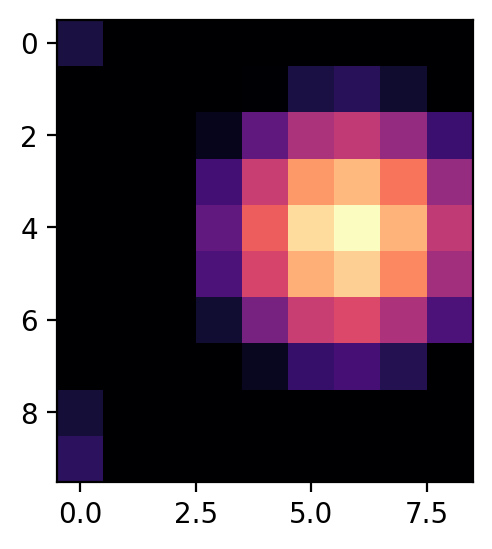

starting w=4, l=11
Warmup Complete
0


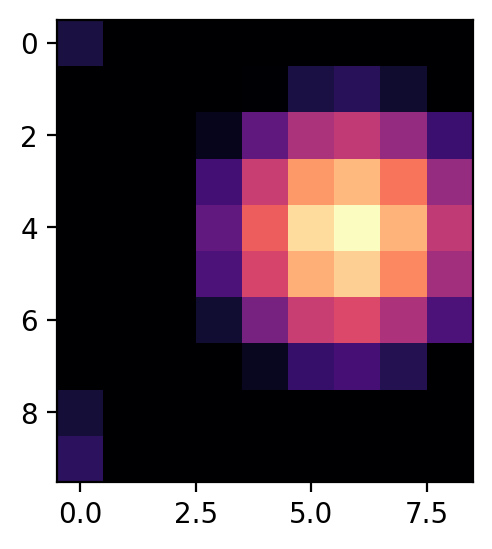

In [91]:
velocity_backup = np.copy(velocity)
velocity = velocity_backup[:100]
n_timebins = velocity.shape[0]
n_landmarks = l_pos.shape[0]

# Initialize output arrays
all_As, all_Bs = [np.zeros((n_weight_noises, n_l_str, n_timebins, N)) for i in range(2)]
all_A_ls = np.zeros((n_weight_noises, n_l_str, n_timebins, n_landmarks, n_ln))
all_Ws = np.zeros((n_weight_noises, n_timebins, N, N)) # not affected by l_str
W_ls = np.zeros((n_landmarks, N)) # since no Hebbian plasticity, will use same landmar-grid weight matrix across all simulations
all_noisy_betas = np.zeros((n_weight_noises, n_l_str, n_timebins))

first_noise_iteration = True

# The weight calculation is by the far the computationally most expensive operation. 
# But, we actually don't need to calculate weight matrix each run, since it's dependent only on velocity, beta, and the weight noise.
# So, if the betas, velocities, and weight noises are the same between two runs, we can use the same weight matrix.
# Additionally, the landmark weight matrix is the same as long as l_pos is the same between two runs and there's no Hebbian plasticity.

# Precalculate the landmark weight matrix to be used across all runs
pre_v = np.ones((1, 2))
pre_n_warmup_bins = 0
(_, _, _, _, _, W_ls, _, _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                pre_v, start_pos, l_pos, 0, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                pre_n_warmup_bins, B0, beta_noise=0, weight_noise=0, W_input=None, W_l_input=None, seed=1, output_bins=50000)
W_ls = np.tile(W_ls, (n_timebins, 1, 1, 1))

for w in range(n_weight_noises):
    weight_noise = all_weight_noises[w]

    for l in range(n_l_str):
        print(f'starting w={w}, l={l}')
        l_str = all_l_str[l]

        if first_noise_iteration:
            (all_As[w,l], all_Bs[w,l], all_Ws[w],
             _, all_A_ls[w,l], _,
             all_noisy_betas[w,l,:], _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                            velocity, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                            n_warmup_bins, B0, beta_noise=beta_noise, weight_noise=weight_noise, W_input=None, W_l_input=W_ls, seed=1, 
                                                            output_bins=output_bins)
            first_noise_iteration = False

        else:
            W_input = all_Ws[w]
            
            (all_As[w,l], all_Bs[w,l], _,
             _, all_A_ls[w,l], _,
             all_noisy_betas[w,l,:], _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                              velocity, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                              n_warmup_bins, B0, beta_noise=beta_noise, weight_noise=weight_noise, W_input=W_input, W_l_input=W_ls, seed=1, 
                                                              output_bins=output_bins)
    first_noise_iteration = True



In [85]:
W_ls.shape

(100, 4, 1, 90)